In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df_airticket=pd.read_excel('Data/Data_Train.xlsx')
df_copy= df_airticket.copy()

In [5]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [6]:
# remove Additional_Info


In [7]:
df_copy.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [8]:
df_copy.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [9]:
df_copy.Destination=df_copy.Destination.replace('New Delhi','Delhi')

In [10]:
df_copy.Destination.unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [11]:
df_copy.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
df_copy.Airline=df_copy.Airline.replace({
    'Vistara Premium economy':'Vistara',
    'Jet Airways Business':'Jet Airways',
    'Multiple carriers Premium economy':'Multiple carriers'
    })

In [13]:
df_copy.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [14]:
df_copy.Total_Stops.mode()[0]

'1 stop'

In [15]:
df_copy.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [16]:
df_copy[df_copy.Total_Stops.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,Null,7480


In [17]:
df_copy.Total_Stops.fillna(df_copy.Total_Stops.mode()[0],inplace=True)

In [18]:
# df_copy.Total_Stops=df_copy.Total_Stops.replace(to_replace=r'\D*(\d+)\D*',value=r'\1',regex=True)
# df_copy.Total_Stops=df_copy.Total_Stops.replace(to_replace=r'^(\D*)$',value=0,regex=True)

In [19]:
import re
df_copy['Stops']=df_copy.Total_Stops.map(lambda x:int(re.findall(r'\D*(\d+)\D*',x)[0]) if len(re.findall(r'\D*(\d+)\D*',x)) else 0)

In [20]:
df_copy

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Stops
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,1
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107,0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145,0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229,0
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648,0


In [21]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Stops
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,1
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1


In [22]:
import re
def modify_duration(duration):
    match=re.findall(r'(?:(\d+)h)?\s*(?:(\d+)m)?',duration)
    hrs= match[0][0] if match[0][0] else 0
    mns= match[0][1] if match[0][1] else 0
    total_hrs=int(hrs)+int(mns)/60
    return total_hrs
    
df_copy['Duration_hr'] = df_copy.Duration.apply(modify_duration)
    

In [23]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Stops,Duration_hr
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0,2.833333
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,2,7.416667
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,2,19.000000
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,1,5.416667
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,4.750000


In [24]:
df_copy['Arrival_Time_hrs']=df_copy.Arrival_Time.map(lambda time: int(re.findall(r'(\d+):(\d+)',time)[0][0]))
df_copy['Arrival_Time_mins']=df_copy.Arrival_Time.map(lambda time: int(re.findall(r'(\d+):(\d+)',time)[0][1]))

In [25]:
df_copy['Dep_Time_hrs']=df_copy.Dep_Time.map(lambda time: int(re.findall(r'(\d+):(\d+)',time)[0][0]))
df_copy['Dep_Time_mins']=df_copy.Dep_Time.map(lambda time: int(re.findall(r'(\d+):(\d+)',time)[0][1]))

In [26]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Stops,Duration_hr,Arrival_Time_hrs,Arrival_Time_mins,Dep_Time_hrs,Dep_Time_mins
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,0,2.833333,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,2,7.416667,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,2,19.000000,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,1,5.416667,23,30,18,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,1,4.750000,21,35,16,50


In [27]:
df_copy.Date_of_Journey=pd.DatetimeIndex(df_copy.Date_of_Journey,dayfirst=True)

In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10683 non-null  object        
 1   Date_of_Journey    10683 non-null  datetime64[ns]
 2   Source             10683 non-null  object        
 3   Destination        10683 non-null  object        
 4   Route              10682 non-null  object        
 5   Dep_Time           10683 non-null  object        
 6   Arrival_Time       10683 non-null  object        
 7   Duration           10683 non-null  object        
 8   Total_Stops        10683 non-null  object        
 9   Additional_Info    10683 non-null  object        
 10  Price              10683 non-null  int64         
 11  Stops              10683 non-null  int64         
 12  Duration_hr        10683 non-null  float64       
 13  Arrival_Time_hrs   10683 non-null  int64         
 14  Arriva

In [29]:
df_copy['Day']=df_copy.Date_of_Journey.dt.day
df_copy['Month']=df_copy.Date_of_Journey.dt.month
df_copy['Year']=df_copy.Date_of_Journey.dt.year
df_copy['Week']=df_copy.Date_of_Journey.dt.weekday

In [30]:
df_copy.drop(columns=['Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info','Date_of_Journey'],inplace=True)

In [31]:
df_eda=df_copy.copy()

In [32]:
df_eda.head()

,Airline,Source,Destination,Route,Price,Stops,Duration_hr,Arrival_Time_hrs,Arrival_Time_mins,Dep_Time_hrs,Dep_Time_mins,Day,Month,Year,Week
0,IndiGo,Banglore,Delhi,BLR → DEL,3897,0,2.833333,1,10,22,20,24,3,2019,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,2,7.416667,13,15,5,50,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,2,19.000000,4,25,9,25,9,6,2019,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,1,5.416667,23,30,18,5,12,5,2019,6
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,13302,1,4.750000,21,35,16,50,1,3,2019,4


<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Import libraries</b></div>

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Data Preview </b>

In [33]:
df_eda.head()

,Airline,Source,Destination,Route,Price,Stops,Duration_hr,Arrival_Time_hrs,Arrival_Time_mins,Dep_Time_hrs,Dep_Time_mins,Day,Month,Year,Week
0,IndiGo,Banglore,Delhi,BLR → DEL,3897,0,2.833333,1,10,22,20,24,3,2019,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,2,7.416667,13,15,5,50,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,2,19.000000,4,25,9,25,9,6,2019,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,1,5.416667,23,30,18,5,12,5,2019,6
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,13302,1,4.750000,21,35,16,50,1,3,2019,4


<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Basic Insights About Data</b></div>

In [34]:
df_eda.shape

(10683, 15)

### <span style='color:#254E58'>💬 Insight </span>

- There are 10683 rows and 15 columns.


In [37]:
df_eda.describe(include='object').T

,count,unique,top,freq
Airline,10683,9,Jet Airways,3855
Source,10683,5,Delhi,4537
Destination,10683,5,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376


### <span style='color:#254E58'>💬 Insight </span>

- Mostly people choose `Jet Airways` over other airlines. This maybe due to lesser fare charge or better customer relationship.
- majority of individuals opt for travel from Delhi to Cochin with a layover in Mumbai.

In [40]:
df_eda.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.000000,5277.000000,8372.000000,12373.0,79512.000000
Stops,10683.0,0.824207,0.675199,0.000000,0.000000,1.000000,1.0,4.000000
Duration_hr,10683.0,10.718221,8.464367,0.083333,2.833333,8.666667,15.5,47.666667
Arrival_Time_hrs,10683.0,13.348778,6.859125,0.000000,8.000000,14.000000,19.0,23.000000
Arrival_Time_mins,10683.0,24.690630,16.506036,0.000000,10.000000,25.000000,35.0,55.000000
Dep_Time_hrs,10683.0,12.490686,5.748650,0.000000,8.000000,11.000000,18.0,23.000000
Dep_Time_mins,10683.0,24.411214,18.767980,0.000000,5.000000,25.000000,40.0,55.000000
Day,10683.0,13.508378,8.479277,1.000000,6.000000,12.000000,21.0,27.000000
Month,10683.0,4.708602,1.164357,3.000000,3.000000,5.000000,6.0,6.000000
Year,10683.0,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.0,2019.000000


### <span style='color:#254E58'>💬 Insight </span>

- Dataset shows data about airline in the year `2019`.
- Min air fare was `1759` and max was `79512`

In [46]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Source             10683 non-null  object 
 2   Destination        10683 non-null  object 
 3   Route              10682 non-null  object 
 4   Price              10683 non-null  int64  
 5   Stops              10683 non-null  int64  
 6   Duration_hr        10683 non-null  float64
 7   Arrival_Time_hrs   10683 non-null  int64  
 8   Arrival_Time_mins  10683 non-null  int64  
 9   Dep_Time_hrs       10683 non-null  int64  
 10  Dep_Time_mins      10683 non-null  int64  
 11  Day                10683 non-null  int32  
 12  Month              10683 non-null  int32  
 13  Year               10683 non-null  int32  
 14  Week               10683 non-null  int32  
dtypes: float64(1), int32(4), int64(6), object(4)
memory usage: 1.1+ MB


### <span style='color:#254E58'>💬 Insight </span>

- there is a single null value in `Route` there are no other null values.
- Categorical columns: 'Airline', 'Source', 'Destination', 'Route'
- Numerical columns: 'Price', 'Stops', 'Duration_hr', 'Arrival_Time_hrs',
       'Arrival_Time_mins', 'Dep_Time_hrs', 'Dep_Time_mins', 'Day', 'Month',
       'Year', 'Week'


In [50]:
df_eda.nunique()

Airline                 9
Source                  5
Destination             5
Route                 128
Price                1870
Stops                   5
Duration_hr           368
Arrival_Time_hrs       24
Arrival_Time_mins      12
Dep_Time_hrs           24
Dep_Time_mins          12
Day                    10
Month                   4
Year                    1
Week                    7
dtype: int64

<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Identifying Missing Values</b></div>

In [53]:
df_eda.isnull().sum()

Airline              0
Source               0
Destination          0
Route                1
Price                0
Stops                0
Duration_hr          0
Arrival_Time_hrs     0
Arrival_Time_mins    0
Dep_Time_hrs         0
Dep_Time_mins        0
Day                  0
Month                0
Year                 0
Week                 0
dtype: int64

### <span style='color:#254E58'>💬 Insight </span>

- there is a single null value in `Route` there are no other null values.


<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Univariate analysis</b></div>

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Columns in dataset </b>

In [58]:
df_eda.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Price', 'Stops',
       'Duration_hr', 'Arrival_Time_hrs', 'Arrival_Time_mins', 'Dep_Time_hrs',
       'Dep_Time_mins', 'Day', 'Month', 'Year', 'Week'],
      dtype='object')

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis Based on Airline </b>

In [60]:
df_eda.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [61]:
df_eda.Airline.value_counts()

Airline
Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: count, dtype: int64

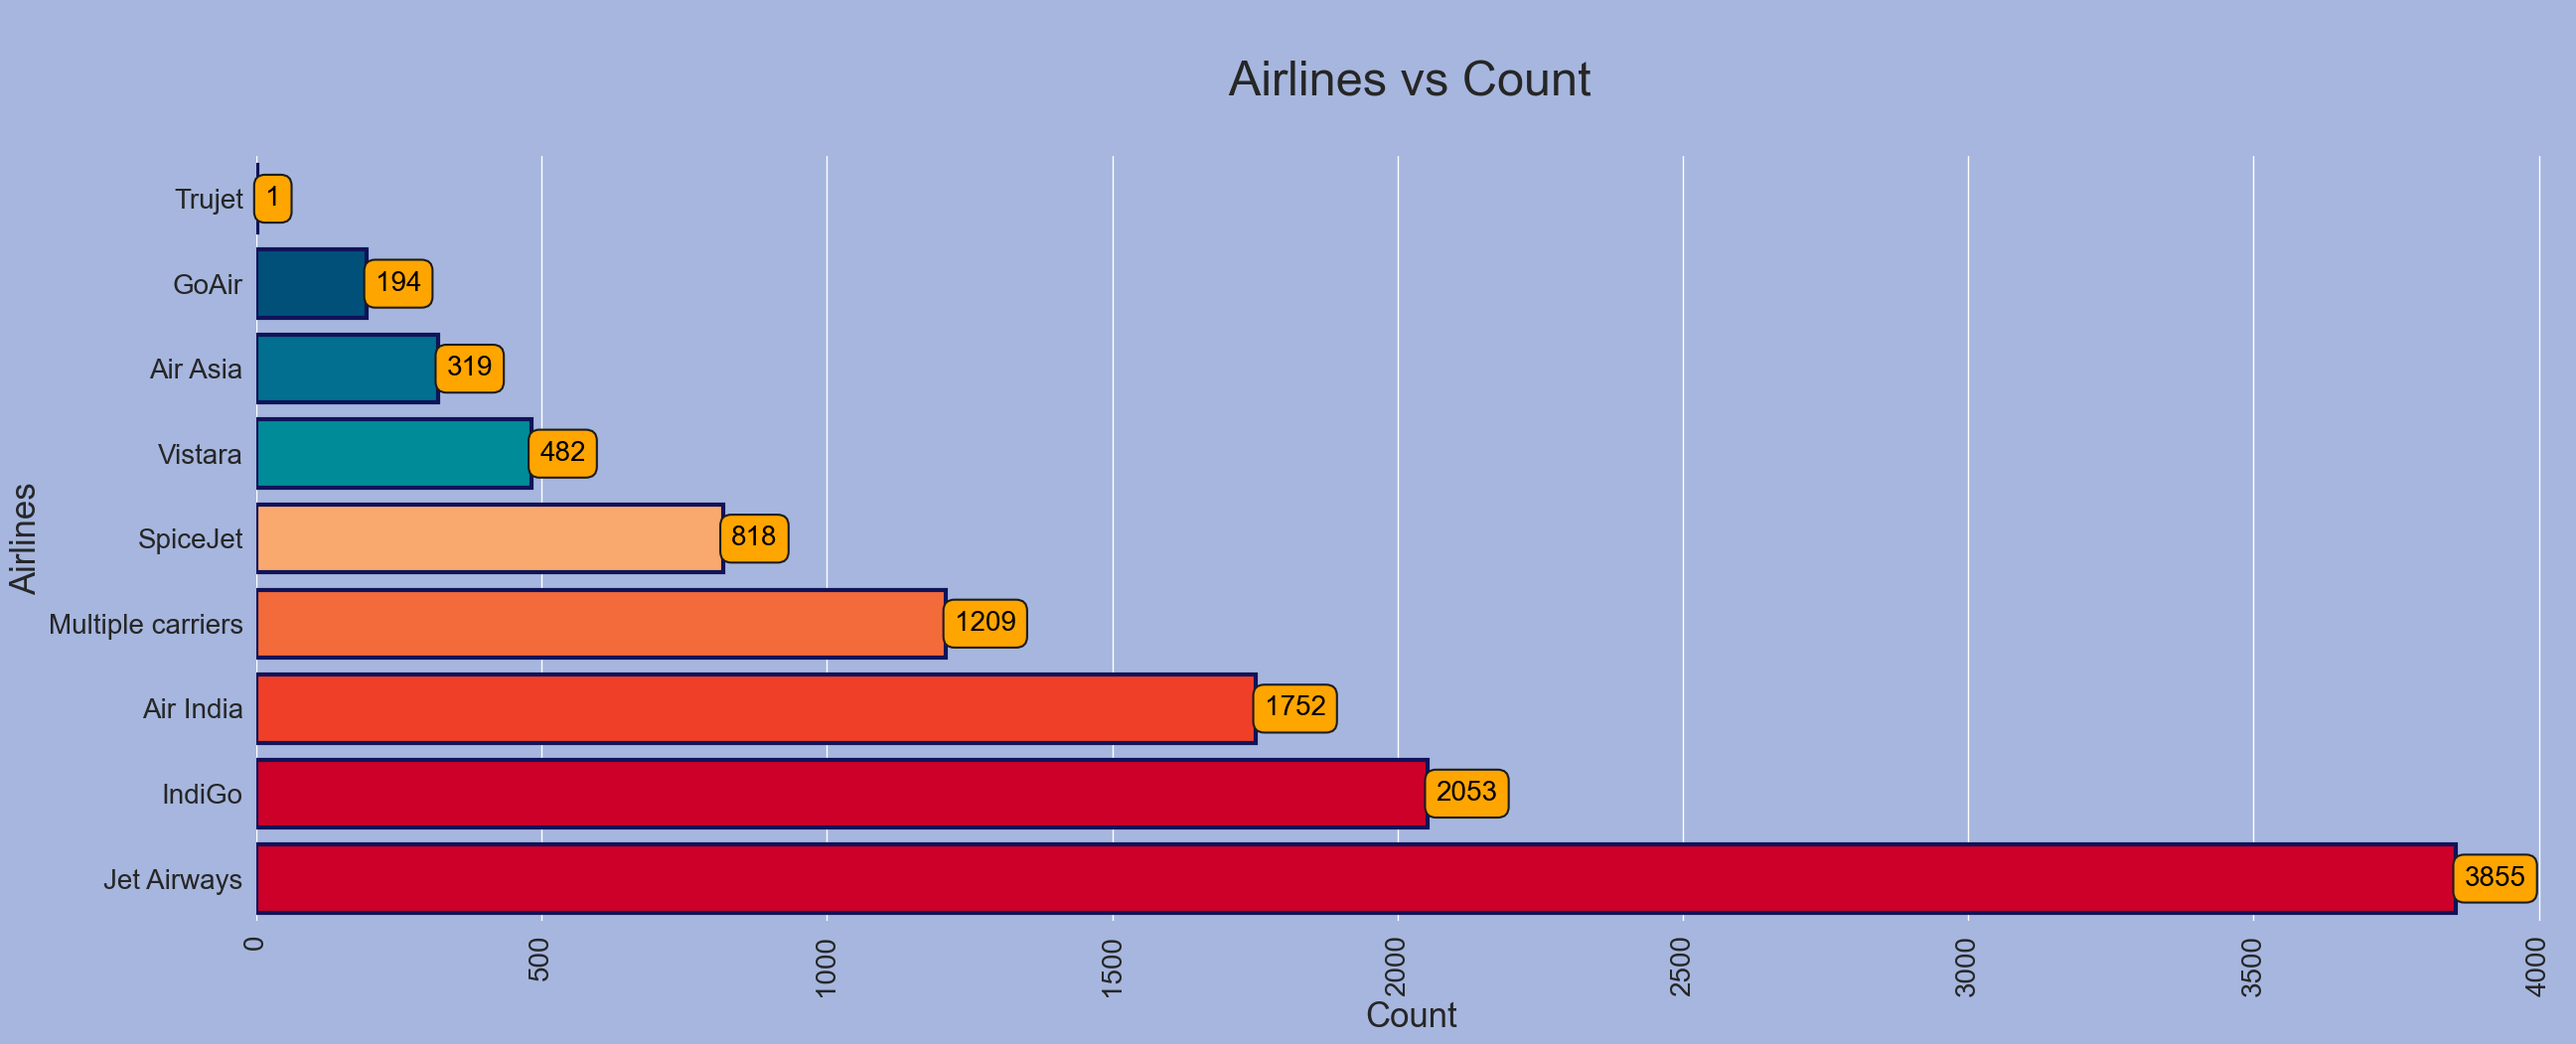

In [172]:
plt.subplots(figsize=(30, 10))
airlines=df_eda.groupby('Airline').Airline.count().sort_values()

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=airlines.values,y=airlines.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n Airlines vs Count \n",fontsize=35)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90,fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)

p.set_xlabel('Count',fontsize=25)
p.set_ylabel('Airlines',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- There are 9 airlines.
- Mostly people choose `Jet Airways` followed by `IndiGo`
- Least used airline is `Trujet` only one customer

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis based on source</b>

In [174]:
df_eda.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

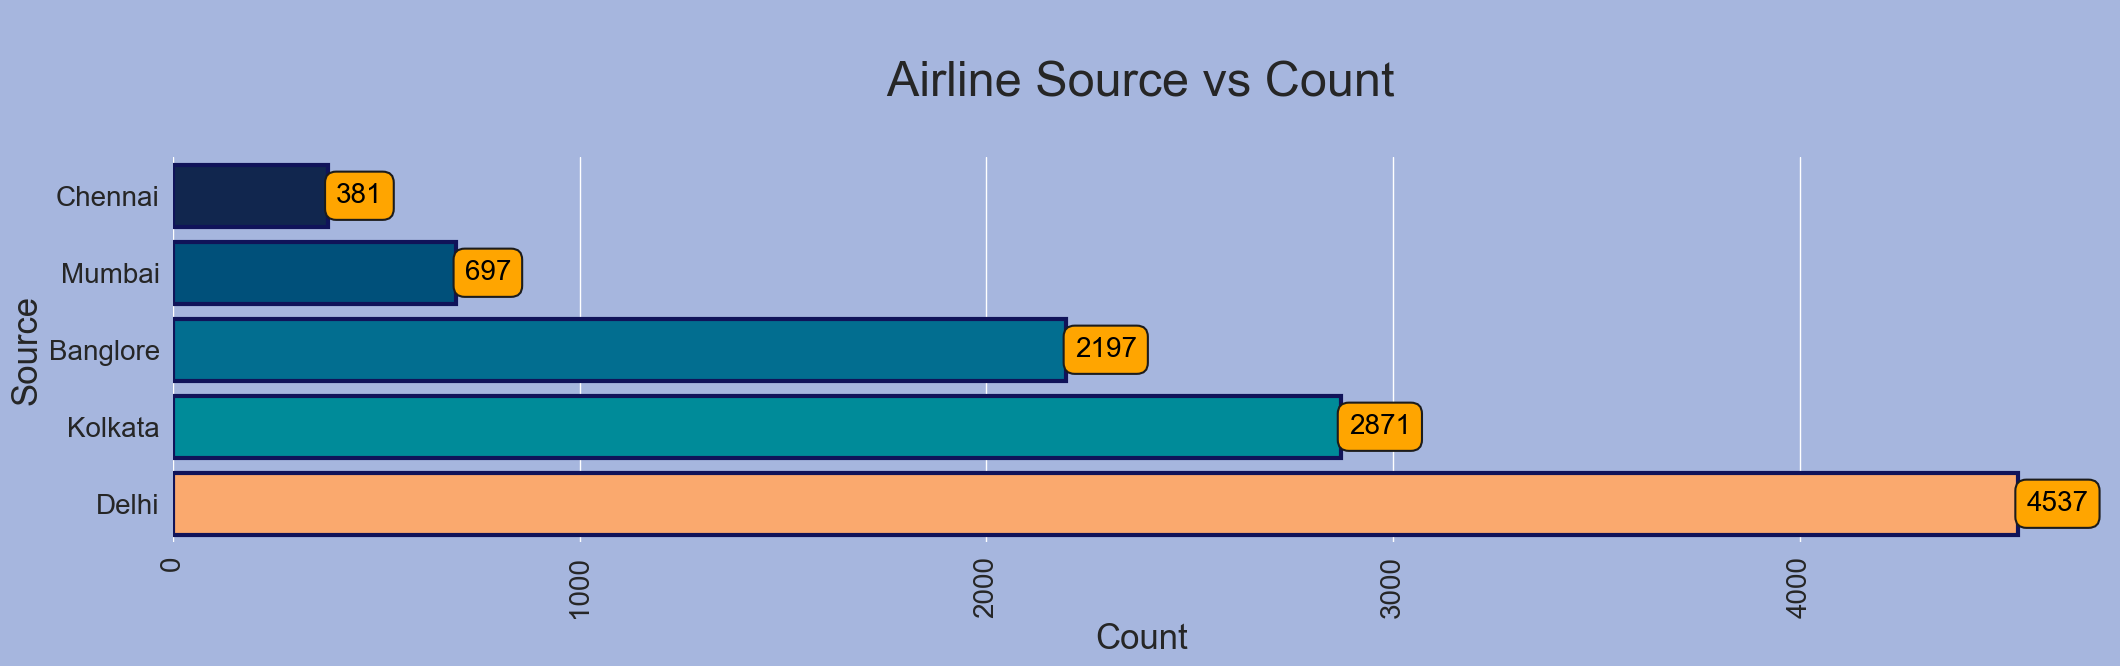

In [173]:
plt.subplots(figsize=(25, 5))
source=df_eda.groupby('Source').Source.count().sort_values()

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=source.values,y=source.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n Airline Source vs Count \n",fontsize=35)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90,fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)
p.set_xlabel('Count',fontsize=25)
p.set_ylabel('Source',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- Most customer are from `Delhi` followed by `Kolkata`

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis based on Destination</b>

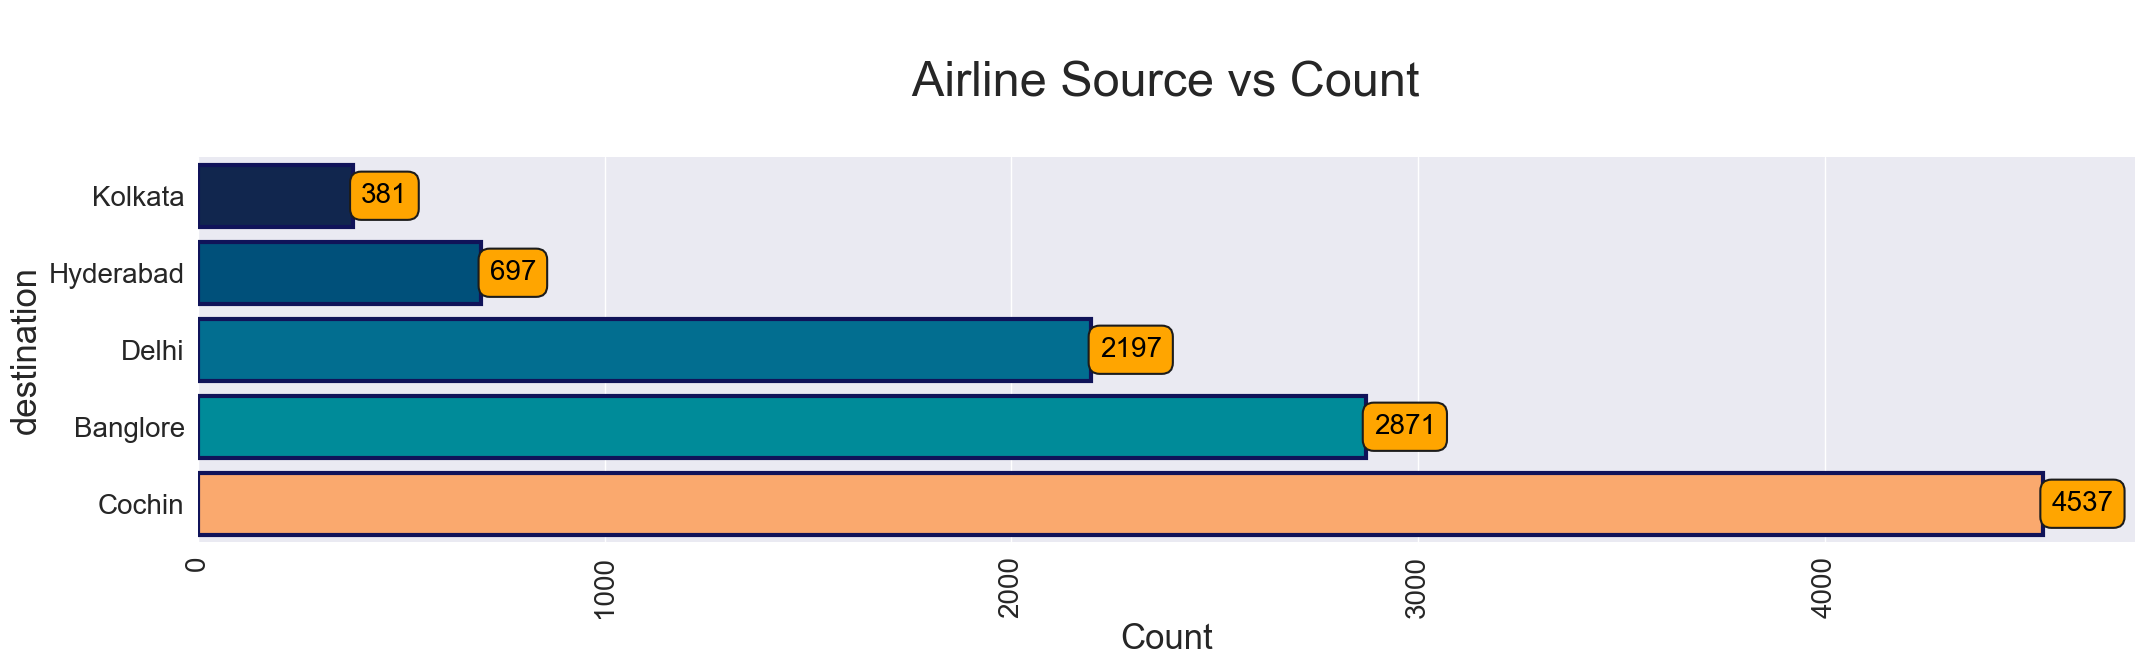

In [180]:
plt.subplots(figsize=(25, 5))
destination=df_eda.groupby('Destination').Destination.count().sort_values()

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=destination.values,y=destination.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n Airline Source vs Count \n",fontsize=35)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90,fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)
p.set_xlabel('Count',fontsize=25)
p.set_ylabel('destination',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- Most customer are from `Cochin` followed by `Banglore`
- from source and destination column ist identified all flights are domestic.

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis based on No of Layover</b>

In [242]:
stop=df_eda.groupby('Stops').Stops.count().sort_values(ascending=True)
colors = ["gold", "mediumturquoise", "darkorange", "lightgreen",'lightorange']
fig=px.pie(
    values=stop.values,
    names=stop.index,
    title= 'Analysis Based On No Of Connection Flight',
    width=850,height=600,
    color_discrete_sequence=px.colors.sequential.Sunsetdark,
    template='plotly_dark'
    
       )

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=2)))

fig.show()



### <span style='color:#254E58'>💬 Insight </span>

- flights which have very less or no layover covers around `85%`.
- Customer mostly prefers least layover.

In [244]:
df_eda.Duration_hr.value_counts()

Duration_hr
2.833333     550
1.500000     386
2.750000     337
2.916667     337
2.583333     329
            ... 
31.500000      1
30.416667      1
42.083333      1
4.166667       1
47.666667      1
Name: count, Length: 368, dtype: int64

In [176]:
df_eda.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Price', 'Stops',
       'Duration_hr', 'Arrival_Time_hrs', 'Arrival_Time_mins', 'Dep_Time_hrs',
       'Dep_Time_mins', 'Day', 'Month', 'Year', 'Week'],
      dtype='object')